# Election Forecasting Revisited

<img src="images/donkey-and-elephant.jpg"/>

In the recitation from Unit 3, we used logistic regression on polling data in order to construct US presidential election predictions. We separated our data into a training set, containing data from 2004 and 2008 polls, and a test set, containing the data from 2012 polls. We then proceeded to develop a logistic regression model to forecast the 2012 US presidential election.

In this homework problem, we'll revisit our logistic regression model from Unit 3, and learn how to plot the output on a map of the United States. Unlike what we did in the Crime lecture, this time we'll be plotting predictions rather than data!

First, load the ggplot2, maps, and ggmap packages using the library function. All three packages should be installed on your computer from lecture, but if not, you may need to install them too using the install.packages function.

Then, load the US map and save it to the variable statesMap, like we did during the Crime lecture:

    statesMap = map_data("state")

The maps package contains other built-in maps, including a US county map, a world map, and maps for France and Italy.

### Load packages

In [1]:
#install.packages("devtools")
library(maps)
library(devtools)  
library(ggmap)

Loading required package: usethis

Loading required package: ggplot2

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



### Problem 1.1 - Drawing a Map of the US
If you look at the structure of the statesMap data frame using the str function, you should see that there are 6 variables. One of the variables, group, defines the different shapes or polygons on the map. Sometimes a state may have multiple groups, for example, if it includes islands. **How many different groups are there?**

In [2]:
# Load StateMap
statesMap = map_data("state")

# Output structure 
str(statesMap)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


In [3]:
table(statesMap$group)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 202  149  312  516   79   91   94   10  872  381  233  329  257  256  113  397 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 650  399  566   36  220   30  460  370  373  382  315  238  208   70  125  205 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
  78   16  290   21  168   37  733   12  105  238  284  236  172   66  304  166 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
 289 1088   59  129   96   15  623   17   17   19   44  448  373  388   68 

In [4]:
nrow(table(statesMap$group))

[1] 63

The variable "order" defines the order to connect the points within each group, and the variable "region" gives the name of the state.

### Problem 1.2 - Drawing a Map of the US
You can draw a map of the United States by typing the following in your R console:

    ggplot(statesMap, aes(x = long, y = lat, group = group)) + geom_polygon(fill = "white", color = "black")

We specified two colors in geom_polygon -- fill and color. **Which one defined the color of the outline of the states?**

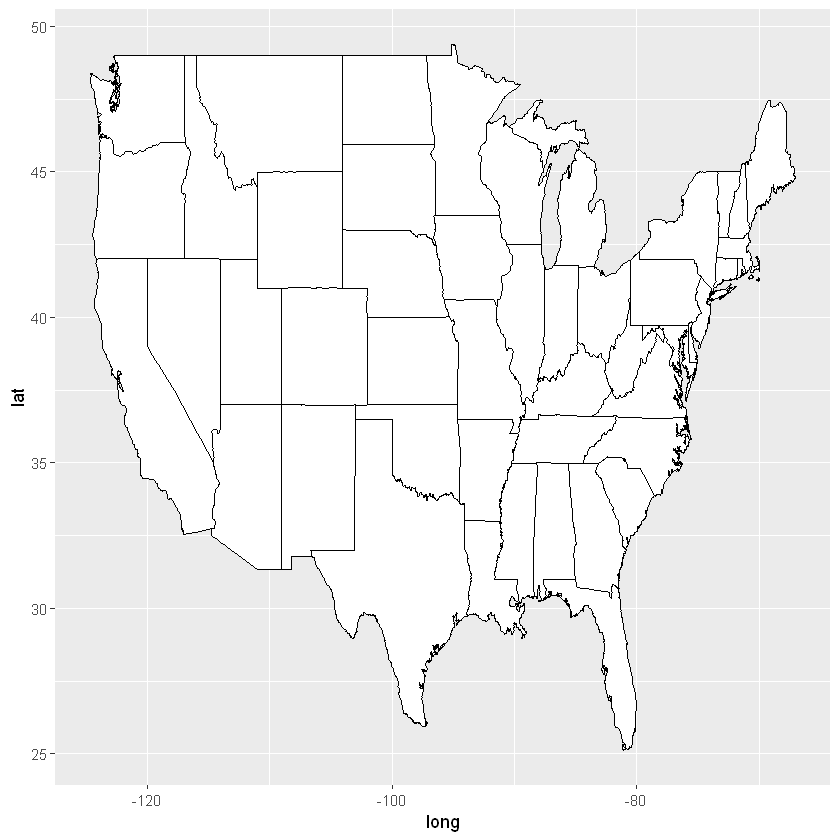

In [5]:
# Draw Map of US
ggplot(statesMap, aes(x = long, y = lat, group = group)) + geom_polygon(fill = "white", color = "black") 

Answer: Color = outline of the states.

### Problem 2.1 - Coloring the States by Predictions
Now, let's color the map of the US according to our 2012 US presidential election predictions from the Unit 3 Recitation. We'll rebuild the model here, using the dataset PollingImputed.csv. Be sure to use this file so that you don't have to redo the imputation to fill in the missing values, like we did in the Unit 3 Recitation.

Load the data using the read.csv function, and call it "polling". Then split the data using the subset function into a training set called "Train" that has observations from 2004 and 2008, and a testing set called "Test" that has observations from 2012.

Note that we only have 45 states in our testing set, since we are missing observations for Alaska, Delaware, Alabama, Wyoming, and Vermont, so these states will not appear colored in our map.

In [6]:
# Read data 
polling = read.csv("data/PollingImputed.csv")

head(polling)

,State,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
,<fct>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,Alabama,2004,11,18,5,1,1
2,Alabama,2008,21,25,5,1,1
3,Alaska,2004,19,21,1,1,1
4,Alaska,2008,16,18,6,1,1
5,Arizona,2004,5,15,8,1,1
6,Arizona,2008,5,3,9,1,1


In [7]:
# Split the data

Train = subset(polling, Year == 2004 | Year == 2008)
Test = subset(polling, Year == 2012)

Then, create a logistic regression model and make predictions on the test set using the following commands:

    mod2 = glm(Republican~SurveyUSA+DiffCount, data=Train, family="binomial")

    TestPrediction = predict(mod2, newdata=Test, type="response")

TestPrediction gives the predicted probabilities for each state, but let's also create a vector of Republican/Democrat predictions by using the following command:

    TestPredictionBinary = as.numeric(TestPrediction > 0.5)

In [8]:
# Logistic Regression
mod2 = glm(Republican~SurveyUSA+DiffCount, data=Train, family="binomial")

# Make predictions
TestPrediction = predict(mod2, newdata=Test, type="response")

# Vector of Republican/Democrat
TestPredictionBinary = as.numeric(TestPrediction > 0.5)

Now, put the predictions and state labels in a data.frame so that we can use ggplot:

    predictionDataFrame = data.frame(TestPrediction, TestPredictionBinary, Test$State)

To make sure everything went smoothly, answer the following questions.

In [9]:
# Store predictions and state labels into a dataframe
predictionDataFrame = data.frame(TestPrediction, TestPredictionBinary, Test$State)

**For how many states is our binary prediction 1 (for 2012), corresponding to Republican?**

In [10]:
# Tabulate how many states is our prediction 1
table(TestPredictionBinary)

TestPredictionBinary
 0  1 
23 22 

Answer: 22 states have a binary prediction of 1.

**What is the average predicted probability of our model (on the Test set, for 2012)?**

In [11]:
# Average predicted probability
summary(TestPrediction)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000001 0.0000926 0.0648667 0.4852626 0.9986385 0.9998655 

Answer: Average Predicted Probability = 0.4852

### Problem 2.2 - Coloring the States by Predictions
Now, we need to merge "predictionDataFrame" with the map data "statesMap", like we did in lecture. Before doing so, we need to convert the Test.State variable to lowercase, so that it matches the region variable in statesMap. Do this by typing the following in your R console:

    predictionDataFrame$region = tolower(predictionDataFrame$Test.State)

Now, merge the two data frames using the following command:

    predictionMap = merge(statesMap, predictionDataFrame, by = "region")

Lastly, we need to make sure the observations are in order so that the map is drawn properly, by typing the following:

    predictionMap = predictionMap[order(predictionMap$order),]

In [12]:
# PredictionBinary
predictionDataFrame$region = tolower(predictionDataFrame$Test.State)

In [13]:
# Merge the data
predictionMap = merge(statesMap, predictionDataFrame, by = "region")

In [14]:
# Order the observations
predictionMap = predictionMap[order(predictionMap$order),]

**How many observations are there in predictionMap?**

In [15]:
# Number of observations
nrow(predictionMap)

[1] 15034

**How many observations are there in statesMap?**

In [16]:
# Number of observations
nrow(statesMap)

[1] 15537

### Problem 2.3 - Coloring the States by Predictions
When we merged the data in the previous problem, it caused the number of observations to change. **Why?** Check out the help page for merge by typing ?merge to help you answer this question.

Answer: When we merge data, it only merged the observations that exist in both data sets. So since we are merging based on the region variable, we will lose all observations that have a value of “region” that doesn’t exist in both data frames. You can change this default behavior by using the *all.x* and *all.y* arguments of the merge function.

### Problem 2.4 - Coloring the States by Predictions
Now we are ready to color the US map with our predictions! You can color the states according to our binary predictions by typing the following in your R console:

    ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary)) + 
                                                                                            geom_polygon(color = "black")

**The states appear light blue and dark blue in this map. Which color represents a Republican prediction?**

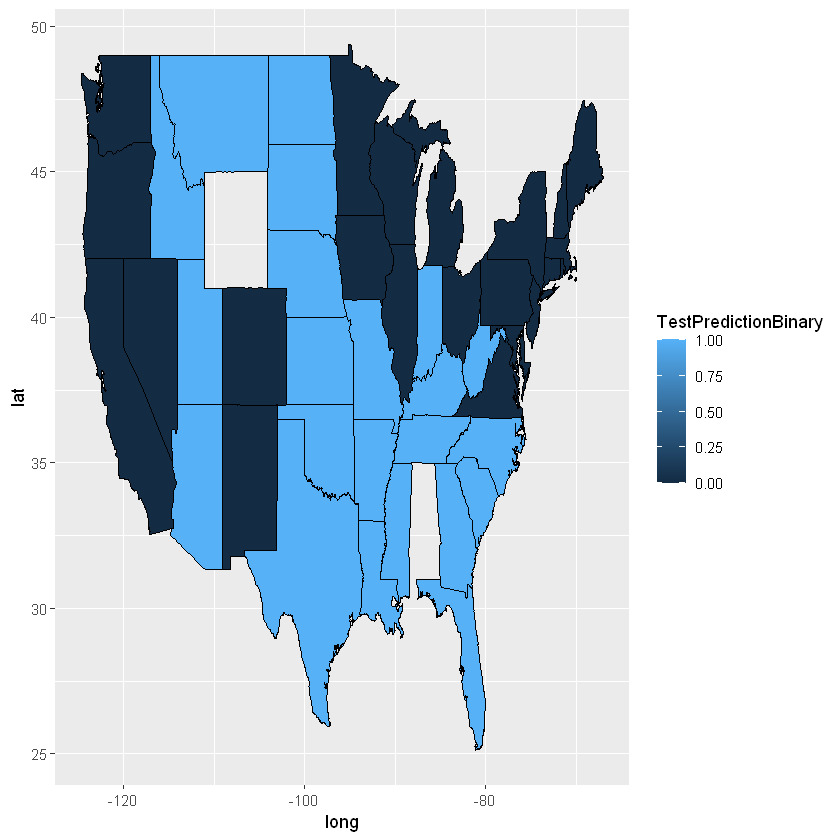

In [17]:
# Color the US Map
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary)) + 
                                                                                            geom_polygon(color = "black")

### Problem 2.5 - Coloring the States by Predictions
We see that the legend displays a blue gradient for outcomes between 0 and 1. However, when plotting the binary predictions there are only two possible outcomes: 0 or 1. Let's replot the map with discrete outcomes. We can also change the color scheme to blue and red, to match the blue color associated with the Democratic Party in the US and the red color associated with the Republican Party in the US. This can be done with the following command:

    ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary))+ 
                     geom_polygon(color = "black") + 
                     scale_fill_gradient(low = "blue", high = "red", guide = "legend", 
                                       breaks= c(0,1), labels = c("Democrat", "Republican"), name = "Prediction 2012")

Alternatively, we could plot the probabilities instead of the binary predictions. Change the plot command above to instead color the states by the variable TestPrediction. You should see a gradient of colors ranging from red to blue. **Do the colors of the states in the map for TestPrediction look different from the colors of the states in the map with TestPredictionBinary? Why or why not?**

NOTE: If you have a hard time seeing the red/blue gradient, feel free to change the color scheme, by changing the arguments low = "blue" and high = "red" to colors of your choice (to see all of the color options in R, type colors() in your R console). You can even change it to a gray scale, by changing the low and high colors to "gray" and "black".

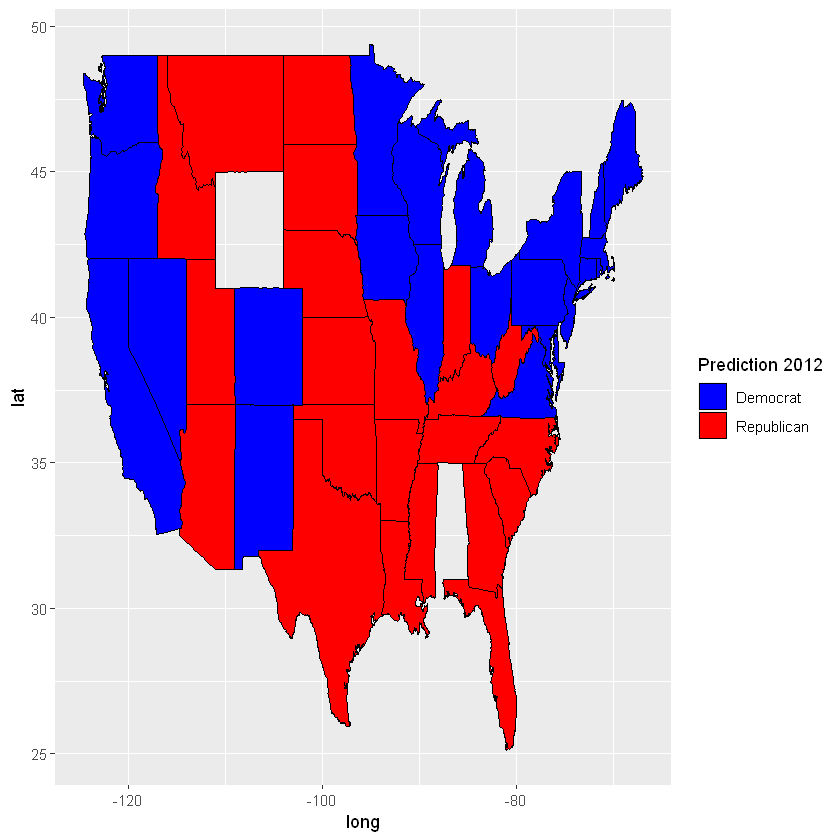

In [18]:
# Replot to show discrete

ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary))+ 
                geom_polygon(color = "black") + 
                scale_fill_gradient(low = "blue", high = "red", guide = "legend", breaks= c(0,1), 
                                                  labels = c("Democrat", "Republican"), name = "Prediction 2012")

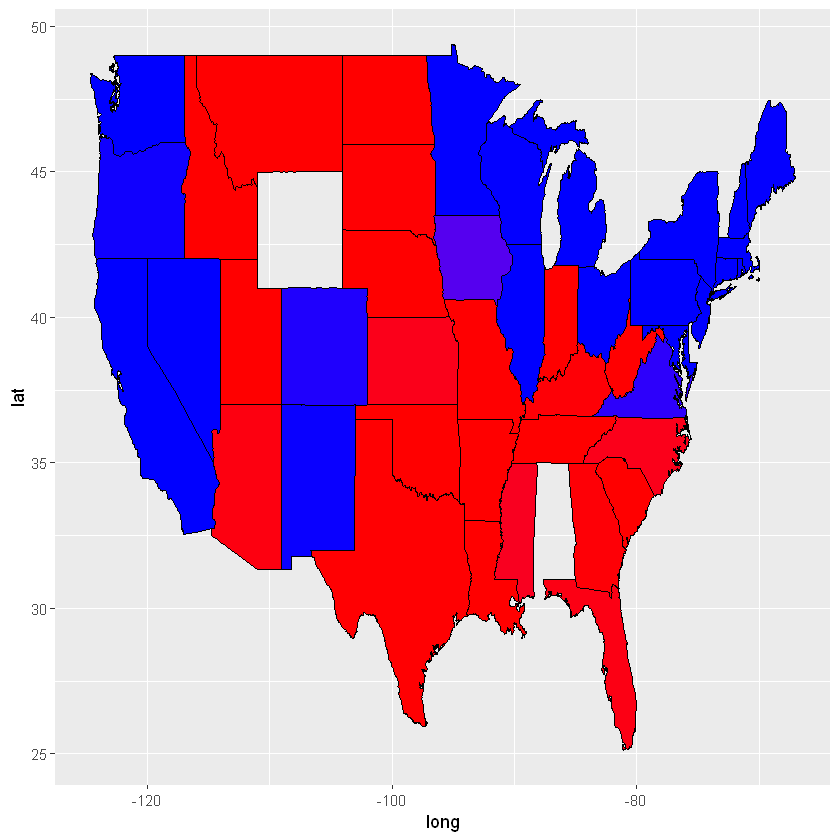

In [19]:
# Replot to show discrete
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPrediction))+ 
                geom_polygon(color = "black") + 
                scale_fill_gradient(low = "blue", high = "red", guide = "legend", breaks= c(0,1), 
                                                  labels = c("Democrat", "Republican"), name = "Prediction 2012")

Answer: The two maps look very similar. This is because most of our predicted probabilities are close to 0 or close to 1.

### Problem 3.1 - Understanding the Predictions
In the 2012 election, the state of Florida ended up being a very close race. It was ultimately won by the Democratic party. **Did we predict this state correctly or incorrectly?**

Answer: We incorrectly predicted this state by predicting that it would be won by the Republican party.

### Problem 3.2 - Understanding the Predictions
**What was our predicted probability for the state of Florida?**

In [20]:
predictionDataFrame

,TestPrediction,TestPredictionBinary,Test.State,region
,<dbl>,<dbl>,<fct>,<chr>
7,9.739028e-01,1,Arizona,arizona
10,9.994949e-01,1,Arkansas,arkansas
13,9.261522e-05,0,California,california
16,9.432967e-03,0,Colorado,colorado
19,3.431627e-05,0,Connecticut,connecticut
24,9.640395e-01,1,Florida,florida
27,9.901680e-01,1,Georgia,georgia
30,4.779656e-05,0,Hawaii,hawaii
33,9.996372e-01,1,Idaho,idaho


In [21]:
which(predictionDataFrame$region=="florida")

[1] 6

In [22]:
predictionDataFrame[6,]

,TestPrediction,TestPredictionBinary,Test.State,region
,<dbl>,<dbl>,<fct>,<chr>
24,0.9640395,1,Florida,florida


In [23]:
predictionDataFrame[which(predictionDataFrame$region=="florida"),]

,TestPrediction,TestPredictionBinary,Test.State,region
,<dbl>,<dbl>,<fct>,<chr>
24,0.9640395,1,Florida,florida


Answer: Predicted Probability = 0.9640395

**What does this imply?**

Our prediction model did not do a very good job of correctly predicting the state of Florida, and we were very confident in our incorrect prediction.

### Problem 4 - Parameter Settings
In this part, we'll explore what the different parameter settings of geom_polygon do. Throughout the problem, use the help page for geom_polygon, which can be accessed by ?geom_polygon. To see more information about a certain parameter, just type a question mark and then the parameter name to get the help page for that parameter. Experiment with different parameter settings to try and replicate the plots!

We'll be asking questions about the following three plots:

### Plot (1)

<img src="images/ElectionForecastingMap1.png"/>

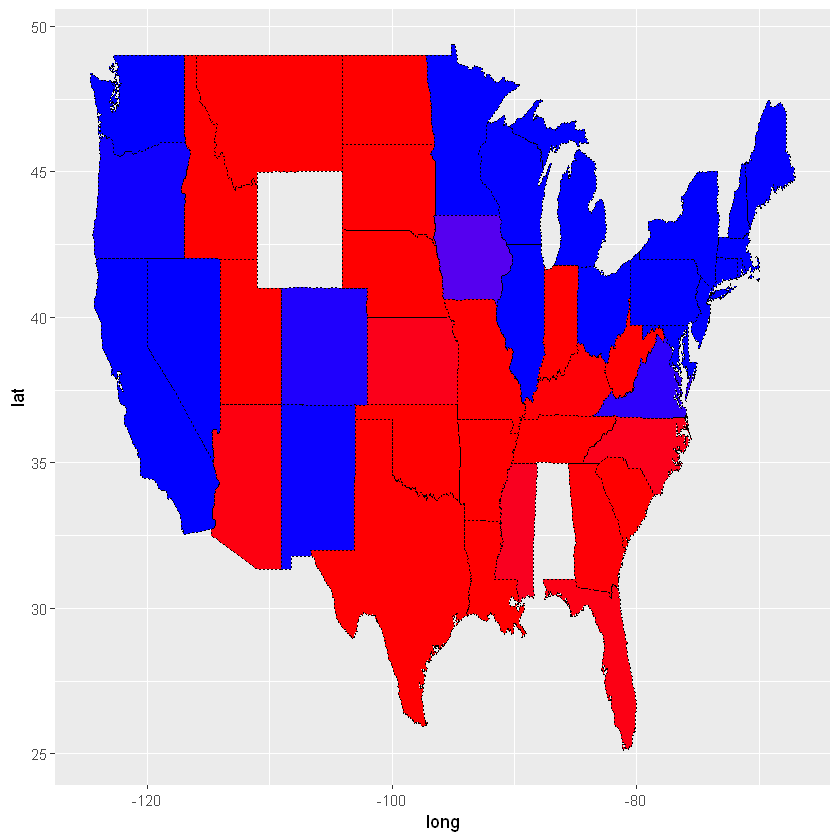

In [24]:
# Plot 1
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPrediction))+ 
                geom_polygon(color = "black", linetype=3) + 
                scale_fill_gradient(low = "blue", high = "red", guide = "legend", breaks= c(0,1), 
                                    labels = c("Democrat", "Republican"), name = "Prediction 2012")

### Plot (2)

<img src="images/ElectionForecastingMap2.png"/>

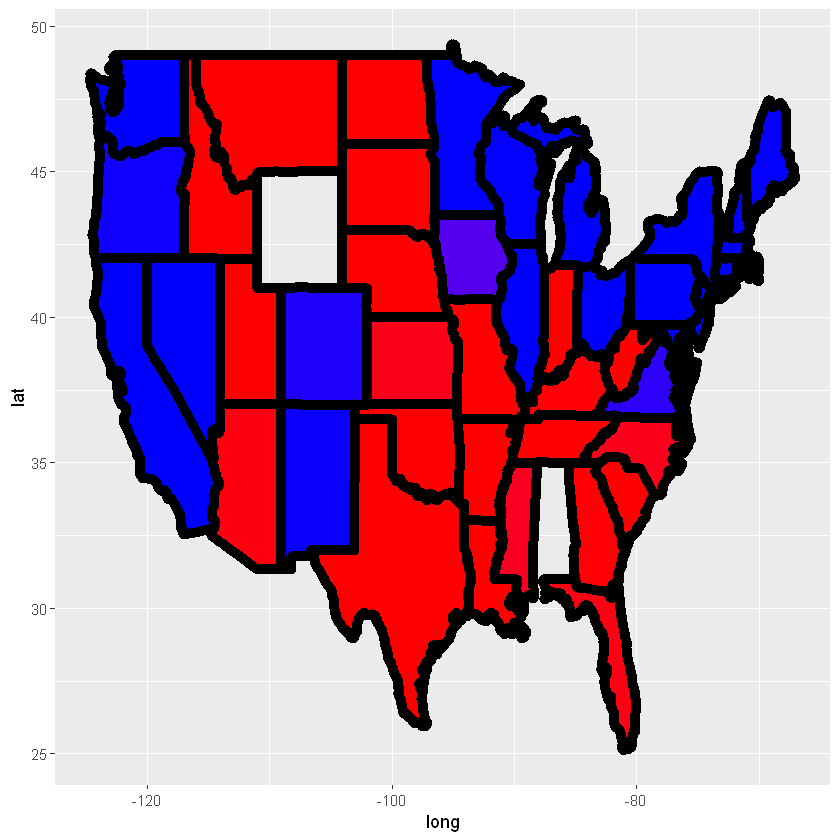

In [25]:
# Plot 2
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPrediction))+ 
                geom_polygon(color = "black", size=3) + 
                scale_fill_gradient(low = "blue", high = "red", guide = "legend", breaks= c(0,1), 
                                    labels = c("Democrat", "Republican"), name = "Prediction 2012")

### Plot (3)

<img src="images/ElectionForecastingMap3.png"/>

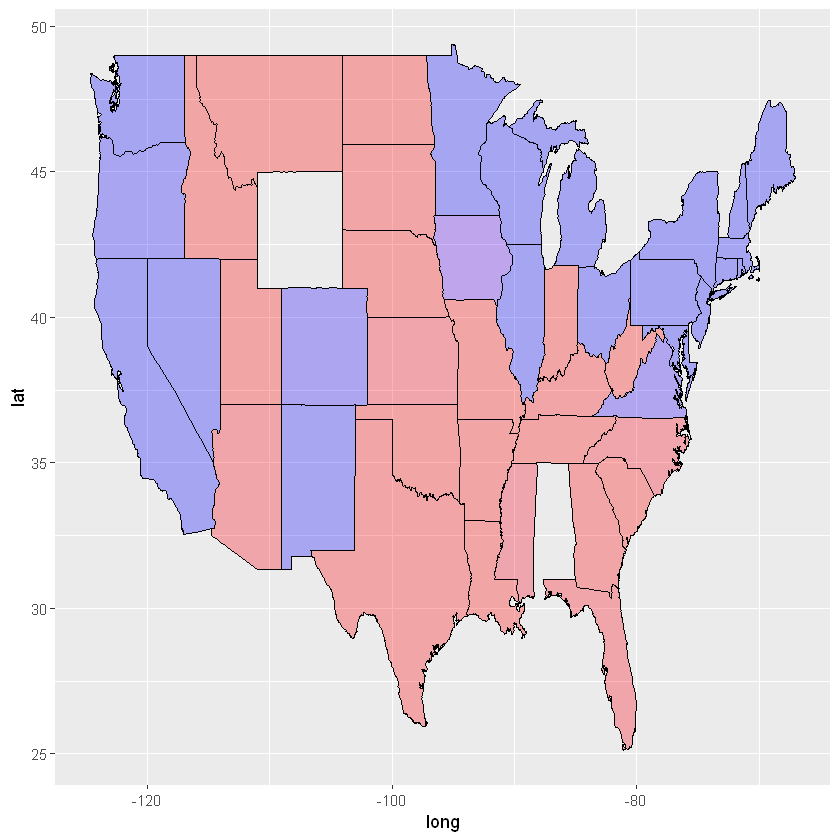

In [26]:
# Plot 3
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPrediction))+ 
                    geom_polygon(color = "black", alpha=0.3) + 
                    scale_fill_gradient(low = "blue", high = "red", guide = "legend", breaks= c(0,1), 
                                        labels = c("Democrat", "Republican"), name = "Prediction 2012")

### Problem 4.1 - Parameter Settings
Plots (1) and (2) were created by setting different parameters of geom_polygon to the value 3.

**What is the name of the parameter we set to have value 3 to create plot (1)?**

Answer: linetype

**What is the name of the parameter we set to have value 3 to create plot (2)?**

Answer: size

### Problem 4.2 - Parameter Settings
Plot (3) was created by changing the value of a different geom_polygon parameter to have value 0.3. **Which parameter did we use?**

Answer: alpha